# Structural Patterns

The creational patterns are guidelines suggested to compose objects in a way that allows to perform new functionalities. Those new functionalities would be harder to do without the new class/function created.

The structural patterns at the same time allows dealing with across entities relationships in an easier and managable way.

In simple words: **How to compose complex objects**

The seven structural patterns available are:
1. Adapter
2. Bridge
3. Composite
4. Decorador
5. Facade
6. Flyweight
7. Proxy

Each of those previous patterns are unique, and can be used in different situations and conditions.

# Bridge

**What is the bridge?**

An adapter is a design pattern created to connect an `abstraction` with additional `implementations`. With the `abstraction`, the client can pick one of the possible `implementations`.


**When should we use it?**

The bridge allows to create code which is decoupled and open-closed. Thus, if in the future, you'll need to incorporate additional features, you don't need to overwrite all the existing code?

**Analogy:**

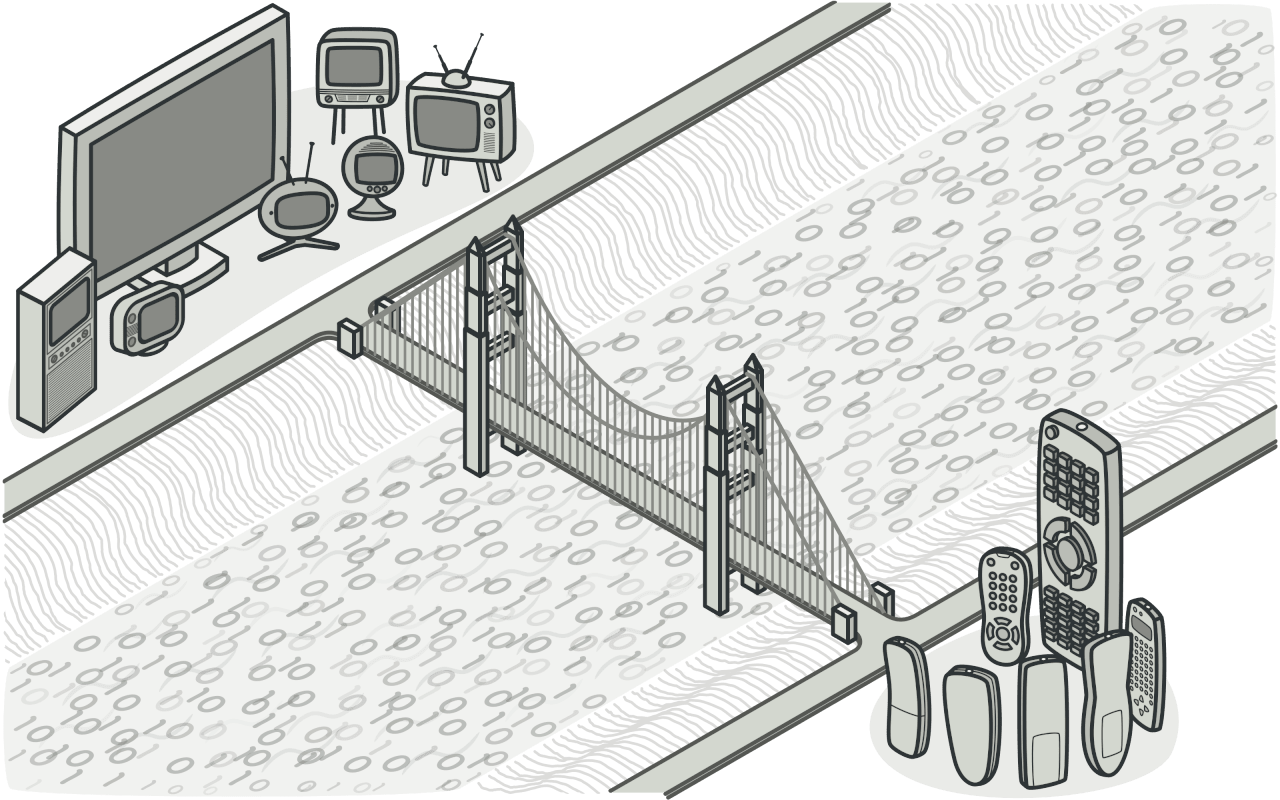

**Scenario**

We need to develop a pre-processing manager tool which can deal with different preprocessing technique such as sqrt, log, box-cox. 

Load some toy dataset

In [12]:
from sklearn.datasets import load_diabetes

import pandas as pd
import numpy as np

In [13]:
df = load_diabetes(as_frame=True, return_X_y=True)

In [14]:
df = pd.concat([df[0], df[1]], axis=1)

## Antipattern

The antipattern is actually quite easy and most people might do this. 

What is? It is creating a single class that manages everything we need.

In [15]:
class PreProcessingManager:
    def __init__(self):
        pass

    def _process_log_transform(
        self, df: pd.DataFrame, target_column: str
    ) -> pd.DataFrame:
        """
        Applies the log transformation over a desired column
        """
        df.loc[:, target_column] = np.log(df.loc[:, target_column] + 1)
        return df

    def _inverse_log_transform(
        self, df: pd.DataFrame, target_column: str
    ) -> pd.DataFrame:
        """
        Inverses the log transformation over a desired column
        """
        df.loc[:, target_column] = np.exp(df.loc[:, target_column]) - 1
        return df

    def _process_sqrt_transform(
        self, df: pd.DataFrame, target_column: str
    ) -> pd.DataFrame:
        """
        Applies the square root transformation over a desired column
        """
        df.loc[:, target_column] = np.sqrt(df.loc[:, target_column])
        return df

    def _inverse_sqrt_transform(
        self, df: pd.DataFrame, target_column: str
    ) -> pd.DataFrame:
        """
        Inverses the square root transformation over a desired column
        """
        df.loc[:, target_column] = df.loc[:, target_column] ** 2
        return df

    def transform(
        self, df: pd.DataFrame, target_column: str, method: str
    ) -> pd.DataFrame:
        """
        Applies a desired transformation over a desired column
        """
        if method == "log":
            return self._process_log_transform(df, target_column)
        elif method == "sqrt":
            return self._process_sqrt_transform(df, target_column)
        else:
            raise ValueError(
                f"Method {method} not recognized. Available methods are: 'log', 'sqrt'"
            )

    def inverse_transform(
        self, df: pd.DataFrame, target_column: str, method: str
    ) -> pd.DataFrame:
        """
        Inverses a desired transformation over a desired column
        """
        if method == "log":
            return self._inverse_log_transform(df, target_column)
        elif method == "sqrt":
            return self._inverse_sqrt_transform(df, target_column)
        else:
            raise ValueError(
                f"Method {method} not recognized. Available methods are: 'log', 'sqrt'"
            )

Review our data

In [16]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Let's going to apply the log transformation over the `target` column.

In [17]:
processor = PreProcessingManager()

In [18]:
df_processed_log = processor.transform(df.copy(), target_column="target", method="log")

In [21]:
df_processed_log.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,5.023881
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,4.330733
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,4.955827
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,5.332719
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,4.912655


Let's do the same with the sqrt transformation

In [22]:
df_processed_sqrt = processor.transform(
    df.copy(), target_column="target", method="sqrt"
)

In [23]:
df_processed_sqrt.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,12.288206
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,8.660254
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,11.874342
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,14.352700
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,11.618950


However, if we want to add the Box-Cox transformation into our `PreProcessingManager` class, it will be a mess. Why? We are breaking the open-closed principle, the interface segregation principle, and the dependency inversion systems principle. 

Everytime we are adding a new processing technique, it is likely to break our entire code.

**How to solve the antipatern?**

1. Create an `Abstract` class that calls the needed `Dependencies`. 
2. Create the `Dependencies` classes.

## Pattern

Create the dependencies, in this case, one dependency will be for each of all possible transformations.

In [25]:
class LogProcessor:
    def __init__(self):
        pass

    def process_data(self, df: pd.DataFrame, target_column: str) -> pd.DataFrame:
        """
        Applies the log transformation over a desired column
        """
        df.loc[:, target_column] = np.log(df.loc[:, target_column] + 1)
        return df

    def inverse_process_data(
        self, df: pd.DataFrame, target_column: str
    ) -> pd.DataFrame:
        """
        Inverses the log transformation over a desired column
        """
        df.loc[:, target_column] = np.exp(df.loc[:, target_column]) - 1
        return df

In [26]:
class SQRTProcessor:
    def __init__(self):
        pass

    def process_data(self, df: pd.DataFrame, target_column: str) -> pd.DataFrame:
        """
        Applies the square root transformation over a desired column
        """
        df.loc[:, target_column] = np.sqrt(df.loc[:, target_column])
        return df

    def inverse_process_data(
        self, df: pd.DataFrame, target_column: str
    ) -> pd.DataFrame:
        """
        Inverses the square root transformation over a desired column
        """
        df.loc[:, target_column] = df.loc[:, target_column] ** 2
        return df

In [28]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

In [29]:
class BoxCoxProcessor:
    def __init__(self):
        self.lambda_value = None

    def process_data(self, df: pd.DataFrame, target_column: str) -> pd.DataFrame:
        """
        Applies the Box-Cox transformation over a desired column
        """
        # verify that all values are positive
        if (df.loc[:, target_column] < 0).any():
            raise ValueError(
                "Box-Cox transformation requires all values to be positive."
            )
        # if negative values are present, shift the data
        df.loc[:, target_column] = df[target_column].apply(lambda x: 1 if x <= 0 else x)
        df.loc[:, target_column], self.lambda_value = boxcox(df.loc[:, target_column])
        return df

    def inverse_process_data(
        self, df: pd.DataFrame, target_column: str
    ) -> pd.DataFrame:
        """
        Inverses the Box-Cox transformation over a desired column
        """
        if self.lambda_value is None:
            raise ValueError(
                "Lambda value is not set. Please apply the Box-Cox transformation first."
            )
        df.loc[:, target_column] = inv_boxcox(
            df.loc[:, target_column], self.lambda_value
        )
        return df

Creating the `Abstract` class

In [32]:
class NewDataProcessor:
    def __init__(self):
        self.client = None

    def __get_client(self, method: str):
        """
        Returns the appropriate processor based on the method
        """
        if method == "log":
            self.client = LogProcessor()
        elif method == "sqrt":
            self.client = SQRTProcessor()
        elif method == "boxcox":
            self.client = BoxCoxProcessor()
        else:
            raise ValueError(
                f"Method {method} not recognized. Available methods are: 'log', 'sqrt', 'boxcox'"
            )

    def transform(
        self, df: pd.DataFrame, target_column: str, method: str
    ) -> pd.DataFrame:
        """
        Applies a desired transformation over a desired column
        """
        self.__get_client(method)
        return self.client.process_data(df, target_column)

    def inverse_transform(
        self, df: pd.DataFrame, target_column: str, method: str
    ) -> pd.DataFrame:
        """
        Inverses a desired transformation over a desired column
        """
        self.__get_client(method)
        return self.client.inverse_process_data(df, target_column)

As you can see in the previous code, now it includes an `Abstraction` class that manages all the dependencies. It does not matter how many dependencies do want include in the future or have currently.

Let's apply over the data the boxcox transformation

In [33]:
df_processed_boxcox = NewDataProcessor().transform(
    df.copy(), target_column="target", method="boxcox"
)

In [36]:
df_processed_boxcox.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,12.401656
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,9.292946
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,12.065710
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,14.020046
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,11.856285


In [35]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


Finally as you can see the `Abstraction` class connects the different classes and each of the classes can be developed independently. We solved the antipattern in separated classes that are connected by the `NewDataProcessor` which works like a bridge.